In [1]:
# Currently, all imports from `forest` must be explicit.  For the below example you need to import the following
# In future, it would be great to have all functions import automatically
import datetime
import os

from forest.bonsai.simulate_log_data import sim_log_data
from forest.bonsai.simulate_gps_data import sim_gps_data, gps_to_csv
from forest.jasmine.traj2stats import Frequency, gps_stats_main
from forest.willow.log_stats import log_stats_main

# user = "3677dn2g"
data_dir_clinical =  "user_datas/clinical"
data_dir_healthy =  "user_datas/healthy"

sum_dir = "user_summaries"

# 1. If you don't have any smartphone data (yet) you can generate fake data
path_to_user_gps_data_healthy = data_dir_healthy
path_to_user_gps_data_clinical = data_dir_clinical
path_to_user_log_data_healthy = data_dir_healthy
path_to_user_log_data_clinical = data_dir_clinical
path_to_user_gps_summary = sum_dir + '/gps'
path_to_user_log_summary = sum_dir + '/log'

if not os.path.isdir(path_to_user_gps_data_healthy):
    os.makedirs(path_to_user_gps_data_healthy)
if not os.path.isdir(path_to_user_gps_data_clinical):
    os.makedirs(path_to_user_gps_data_clinical)

if not os.path.isdir(path_to_user_log_data_healthy):
    os.makedirs(path_to_user_log_data_healthy)
if not os.path.isdir(path_to_user_log_data_clinical):
    os.makedirs(path_to_user_log_data_clinical)

    
if not os.path.isdir(path_to_user_gps_summary):
    os.makedirs(path_to_user_gps_summary)
if not os.path.isdir(path_to_user_log_summary):
    os.makedirs(path_to_user_log_summary)

In [2]:
import warnings
warnings.filterwarnings('ignore')
# 2. Specify parameters for imputation 
# See https://github.com/onnela-lab/forest/wiki/Jasmine-documentation#input for details
# time zone where the study took place (assumes that all participants were always in this time zone)
tz_str = "Iran"
# Generate summary metrics Frequency.HOURLY, Frequency.DAILY or Frequency.BOTH
frequency = Frequency.DAILY
# Save imputed trajectories?
save_traj = True
# Hyperparameters class for imputation (default leave None), from forest.jasmine.traj2stats import Hyperparameters
parameters = None
# list of locations to track if visited, leave None if don't want these summary statistics
places_of_interest = None #['cafe','cinema','hospital','fast_food','restaurant','university','library','bus_station','bank']
# True if want to save a log of all locations and attributes of those locations visited
save_log = False
# threshold of time spent in a location to count as being in that location, in minutes
threshold = 15

# 3. Impute location data and generate mobility summary metrics using the simulated data above
gps_stats_main(path_to_user_gps_data_healthy, path_to_user_gps_summary, tz_str, frequency, save_traj, parameters, None, save_log, threshold)
gps_stats_main(path_to_user_gps_data_clinical, path_to_user_gps_summary, tz_str, frequency, save_traj, parameters, None, save_log, threshold)

User: nv76mhpd
Read in the csv files ...
Collapse data within 10 second intervals ...
Extract flights and pauses ...
Infer unclassified windows ...
Merge consecutive pauses and bridge gaps ...
Selecting basis vectors ...
Imputing missing trajectories ...
Tidying up the trajectories...
Calculating the daily summary stats...
User: 4bblbp9f
Read in the csv files ...
Collapse data within 10 second intervals ...
Extract flights and pauses ...
Infer unclassified windows ...
Merge consecutive pauses and bridge gaps ...
Selecting basis vectors ...
Imputing missing trajectories ...
Tidying up the trajectories...
Calculating the daily summary stats...
User: j3iw6mv8
Read in the csv files ...
Collapse data within 10 second intervals ...
Extract flights and pauses ...
Infer unclassified windows ...
Merge consecutive pauses and bridge gaps ...
Selecting basis vectors ...
Imputing missing trajectories ...
Tidying up the trajectories...
Calculating the daily summary stats...
User: n1xjl738
Read in th

In [3]:
# 4. Generate daily summary metrics for call/text logs
option = "daily"
time_start = None 
time_end = None
participant_ids = None

log_stats_main(path_to_user_log_data_healthy, path_to_user_log_summary, tz_str, option, time_start, time_end, participant_ids)
log_stats_main(path_to_user_log_data_clinical, path_to_user_log_summary, tz_str, option, time_start, time_end, participant_ids)

User: nv76mhpd
Data imported ...
Summary statistics obtained. Finished.
User: 4bblbp9f
Data imported ...
Summary statistics obtained. Finished.
User: j3iw6mv8
User j3iw6mv8 : texts data are not collected.
User j3iw6mv8 : calls data are not collected.
User: n1xjl738
Data imported ...
Summary statistics obtained. Finished.
User: sm14zifx
Data imported ...
Summary statistics obtained. Finished.
User: 821sp2le
Data imported ...
Summary statistics obtained. Finished.
User: kaud95w9
Data imported ...
Summary statistics obtained. Finished.
User: 9oeal1cx
Data imported ...
Summary statistics obtained. Finished.
User: mw4v8pvg
User mw4v8pvg : texts data are not collected.
User mw4v8pvg : calls data are not collected.
User: zjdsufqx
Data imported ...
Summary statistics obtained. Finished.
User: 7m9tm127
Data imported ...
Summary statistics obtained. Finished.
User: ivq6dmd7
User ivq6dmd7 : texts data are not collected.
User ivq6dmd7 : calls data are not collected.
User: m7jbqvkn
User m7jbqvkn : 

In [4]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import calendar


In [5]:
## functions used for parsing .csv power_state & call_logs data
def datetime2stamp(time_list,tz_str):
    """
    Docstring
    to check all timezones
        Args: time_list: a list of integers [year, month, day, hour (0-23), min, sec],
          tz_str: timezone (str), where the study is conducted
    please use
    ## from pytz import all_timezones
    ## all_timezones
    Return: Unix time, which is what Beiwe uses
    """
    loc_tz =  timezone(tz_str)
    loc_dt = loc_tz.localize(datetime(time_list[0], time_list[1], time_list[2], time_list[3], time_list[4], time_list[5]))
    utc = timezone("UTC")
    utc_dt = loc_dt.astimezone(utc)
    timestamp = calendar.timegm(utc_dt.timetuple())
    return timestamp

def stamp2datetime(stamp,tz_str):
    """
    Docstring
    Args: stamp: Unix time, integer, the timestamp in Beiwe
          tz_str: timezone (str), where the study is conducted
    please use
    ## from pytz import all_timezones
    ## all_timezones
    to check all timezones
    Return: a list of integers [year, month, day, hour (0-23), min, sec] in the specified tz
    """
    loc_tz =  timezone(tz_str)
    utc = timezone("UTC")
    utc_dt = utc.localize(datetime.utcfromtimestamp(stamp))
    loc_dt = utc_dt.astimezone(loc_tz)
    return [loc_dt.year, loc_dt.month,loc_dt.day,loc_dt.hour,loc_dt.minute,loc_dt.second]

def filename2stamp(filename):
    """
    Docstring
    Args: filename (str), the filename of communication log
    Return: UNIX time (int)
    """
    [d_str,h_str] = filename.split(' ')
    [y,m,d] = np.array(d_str.split('-'),dtype=int)
    h = int(h_str.split('_')[0])
    stamp = datetime2stamp((y,m,d,h,0,0),'UTC')
    return stamp

def read_data(ID:str, study_folder: str, datastream:str, tz_str: str, time_start, time_end):
    """
    Docstring
    Args: ID: beiwe ID; study_folder: the path of the folder which contains all the users
          datastream: 'gps','accelerometer','texts' or 'calls'
          tz_str: where the study is/was conducted
          starting time and ending time of the window of interest
          time should be a list of integers with format [year, month, day, hour, minute, second]
          if time_start is None and time_end is None: then it reads all the available files
          if time_start is None and time_end is given, then it reads all the files before the given time
          if time_start is given and time_end is None, then it reads all the files after the given time
          if identifiers files are present and the earliest identifiers registration timestamp occurred
            after the provided time_start (or if time_start is None) then that identifier timestamp
            will be used instead.
    return: a panda dataframe of the datastream (not for accelerometer data!) and corresponding starting/ending timestamp (UTC),
            you can convert it to numpy array as needed
            For accelerometer data, instead of a panda dataframe, it returns a list of filenames
            The reason is the volume of accelerometer data is too large, we need to process it on the fly:
            read one csv file, process one, not wait until all the csv's are imported (that may be too large in memory!)
    """
    df = pd.DataFrame()
    stamp_start = 1e12
    stamp_end = 0
    folder_path = study_folder + "/" + ID +  "/" + str(datastream)
    ## if text folder exists, call folder must exists
    if not os.path.exists(study_folder + "/" + ID):
        print('User '+ str(ID) + ' does not exist, please check the ID again.')
    elif not os.path.exists(folder_path):
        print('User '+ str(ID) + ' : ' + str(datastream) + ' data are not collected.')
    else:
        filenames = np.sort(np.array(os.listdir(folder_path)))
        ## create a list to convert all filenames to UNIX time
        filestamps = np.array([filename2stamp(filename) for filename in filenames])
        ## find the timestamp in the identifier (when the user was enrolled)
        if os.path.exists(study_folder + "/" + ID + "/identifiers"):
            identifier_Files = os.listdir(study_folder + "/" + ID + "/identifiers")
            identifiers = pd.read_csv(study_folder + "/" + ID + "/identifiers/"+ identifier_Files[0], sep = ",")
            ## now determine the starting and ending time according to the Docstring
            if identifiers.index[0]>10**10:  ## sometimes the identifier has mismatched colnames and columns
                stamp_start1 = identifiers.index[0]/1000
            else:
                stamp_start1 = identifiers["timestamp"][0]/1000
        else:
            stamp_start1 = sorted(filestamps)[0]
        ## now determine the starting and ending time according to the Docstring
        if time_start == None:
            stamp_start = stamp_start1
        else:
            stamp_start2 = datetime2stamp(time_start,tz_str)
            # only allow data after the participant registered (this condition may be violated under
            # test conditions of the beiwe backend.)
            stamp_start = max(stamp_start1,stamp_start2)
        ##Last hour: look at all the subject's directories (except survey) and find the latest date for each directory
        directories = os.listdir(study_folder + "/" + ID)
        directories = list(set(directories)-set(["survey_answers","survey_timings","audio_recordings"]))
        all_timestamps = []
        for i in directories:
            files = os.listdir(study_folder + "/" + ID + "/" + i)
            all_timestamps += [filename2stamp(filename) for filename in files]
        ordered_timestamps = sorted([timestamp for timestamp in all_timestamps if timestamp is not None])
        stamp_end1 = ordered_timestamps[-1]
        if time_end == None:
            stamp_end = stamp_end1
        else:
            stamp_end2 = datetime2stamp(time_end,tz_str)
            stamp_end = min(stamp_end1,stamp_end2)

        ## extract the filenames in range
        files_in_range = filenames[(filestamps>=stamp_start)*(filestamps<stamp_end)]
        if len(files_in_range) == 0:
            sys.stdout.write('User '+ str(ID) + ' : There are no ' + str(datastream) + ' data in range.'+ '\n')
        else:
            if datastream!='accelerometer':
                ## read in the data one by one file and stack them
                for data_file in files_in_range:
                    dest_path = folder_path + "/" + data_file
                    hour_data = pd.read_csv(dest_path)
                    if df.shape[0]==0:
                        df = hour_data
                    else:
                        df = df.append(hour_data,ignore_index=True)
    
    if datastream == "accelerometer":
        return files_in_range, stamp_start, stamp_end
    else:
        return df, stamp_start, stamp_end


In [6]:
def read_bdi(filename):
    df_bdi = pd.DataFrame()
    df_bdi = pd.read_csv(filename)

    farsi2engnum = {'۰':0, '۱':1,'1':1,'۲':2,'۳':3, '۴':4, '۵':5, '۶':6, '۷':7, '۸':8, '۹':9 }
    patient_dict = {}
    colnames = df_bdi.columns.values.tolist()
    for (rownum,row) in df_bdi.iterrows():
        patient_score = 0
        patient_id = row[1]
        for i in range(2,len(colnames)):
            patient_score += farsi2engnum[row[i][0]]
        if patient_id not in patient_dict:
            patient_dict[patient_id] = [patient_score]
        else:
            patient_dict[patient_id].append(patient_score)
    #     if colname == colnames[1]
    return patient_dict

In [7]:
def list_bdi_csv(bdi_folder_path):
    users = os.listdir(bdi_folder_path)
    return [x for x in users if '.csv' in x]

def get_patient_bdi(bdi_folder_path):
    patient_dict = {} 
    for report in list_bdi_csv(bdi_folder_path):    
        add_pdict = read_bdi(bdi_folder_path + report)
        patient_dict.update(add_pdict)

    patient_dict = {x:patient_dict[x] for x in patient_dict if '@' not in x}
    for pscore in patient_dict:
        patient_dict[pscore] = round(np.mean(patient_dict[pscore]),2)
    return patient_dict
    
bdi_path = "user_datas/bdi/"
patient_dict = get_patient_bdi(bdi_path)

In [8]:
short_span = 10 #seconds
def get_power_stats(user, data_path, tz_str = 'Iran'):
    df = read_data(user, data_path, 'power_state', tz_str, None, None)[0]
    df_clean = df.drop(df[df.event.str.len() > 20].index)
    df_clean = df_clean.reset_index(drop=True)
    df_clean.head()
    df_clean['day'] = df_clean["UTC time"].str[:10]
    
    ####calculate total switch ons 
    total_num_switch_on = len(df_clean[df_clean.event == "Screen turned on"])
    daily_num_switch_on = df_clean[df_clean['event'] == "Screen turned on"].groupby('day').count()['event']
    switch_on_index_list = list(df_clean[df_clean.event == "Screen turned on"].index)
    shortspan_indexlist = list()
    longspan_indexlist = list()
    for i in switch_on_index_list:
        if i+1 in df_clean.index and df_clean.loc[i+1].event == "Screen turned off":
            on_stamp = df_clean.loc[i].timestamp
            off_stamp = df_clean.loc[i+1].timestamp
            if (off_stamp - on_stamp < short_span * 1000):
                shortspan_indexlist.append(i)
                shortspan_indexlist.append(i+1)
            else:
                longspan_indexlist.append(i)
                longspan_indexlist.append(i+1)
    ####calculate short checks and long checks
    total_num_short_checks = len(shortspan_indexlist)//2
    total_num_long_checks = len(longspan_indexlist)//2

    daily_num_short_checks = df_clean.loc[shortspan_indexlist].groupby("day").count()["event"].apply(lambda x : x//2)
    daily_num_long_checks = df_clean.loc[longspan_indexlist].groupby("day").count()["event"].apply(lambda x : x//2)
    return { "total_num_switch_on": total_num_switch_on,
            "daily_num_switch_on" : daily_num_switch_on,
            "total_num_short_checks" : total_num_short_checks,
            "total_num_long_checks" : total_num_long_checks,
            "daily_num_short_checks" : daily_num_short_checks,
            "daily_num_long_checks" : daily_num_long_checks,
            "total_days" : len(df_clean.groupby('day')),
            
           }

In [9]:
def get_list_users(user_folder_path):
    users = os.listdir(user_folder_path)
    return [x for x in users if '.' not in x]
data_path_healthy = 'user_datas/healthy'
data_path_clinical = 'user_datas/clinical'
clinical_users = get_list_users(data_path_clinical)
healthy_users = get_list_users(data_path_healthy)
users = clinical_users + healthy_users
power_stats = {}
for user in clinical_users:
    power_stats[user] = get_power_stats(user, data_path_clinical)
for user in healthy_users:
    power_stats[user] = get_power_stats(user, data_path_healthy)
    

In [10]:
import matplotlib.pyplot as plt
mean_daily_num_switch_on_dict = {}
mean_daily_num_short_checks_dict = {}
mean_daily_num_long_checks_dict = {}
total_days_dict = {}
for user in users:
    mean_daily_num_switch_on_dict[user] = round(np.mean(power_stats[user]["daily_num_switch_on"]),2)
    mean_daily_num_short_checks_dict[user] = round(np.mean(power_stats[user]["daily_num_short_checks"]),2)
    mean_daily_num_long_checks_dict[user] = round(np.mean(power_stats[user]["daily_num_long_checks"]),2)
    total_days_dict[user] = power_stats[user]["total_days"]
    
mean_daily_num_short_checks_dict

{'mw4v8pvg': 37.45,
 'zjdsufqx': 9.67,
 '7m9tm127': 7.88,
 'ivq6dmd7': 1.0,
 'm7jbqvkn': 3.42,
 'ic5ud6h3': 7.27,
 'qwpfr8sq': 11.8,
 'poxfw831': 2.94,
 '4wk3zbtb': 1.5,
 '3677dn2g': 27.27,
 'nv76mhpd': 8.85,
 '4bblbp9f': 7.0,
 'j3iw6mv8': 2.94,
 'n1xjl738': 4.0,
 'sm14zifx': 2.8,
 '821sp2le': 1.5,
 'kaud95w9': 21.21,
 '9oeal1cx': 3.83}

In [11]:
## patients who have missing power_state data
missing_dict = {x:patient_dict[x] for x in patient_dict if x not in mean_daily_num_short_checks_dict}
missing_dict

{'ncdmw1uj': 2.0,
 'z962dlj9': 8.67,
 'dj3ew5e2': 4.0,
 'og4hx2by': 6.78,
 'i4ab4gq2': 5.0,
 '5o815o61': 10.0,
 'bcr4w9uo': 24.0}

In [12]:
## function for plotting patients bdi, power_state & total days recorded info
## val = power_state info
def pair_dicts_to_df(dict1, dict2, dict3):
    xval = []
    yval = []
    kval = []
    days = []
    for p in dict1:
        if p in dict2:
            kval.append(p)
            xval.append(dict1[p])
            yval.append(dict2[p])
            days.append(dict3[p])
            
    return pd.DataFrame(dict(user=kval, bdi=xval, val = yval, days = days))
    
pair_dicts_to_df(patient_dict, mean_daily_num_short_checks_dict, total_days_dict)

,user,bdi,val,days
0,nv76mhpd,8.50,8.85,14
1,821sp2le,1.50,1.50,3
2,4bblbp9f,9.50,7.00,10
3,7m9tm127,10.33,7.88,20
4,kaud95w9,5.50,21.21,15
5,3677dn2g,37.00,27.27,11
6,n1xjl738,18.00,4.00,3
7,4wk3zbtb,7.00,1.50,16
8,j3iw6mv8,7.00,2.94,55
9,sm14zifx,10.00,2.80,8


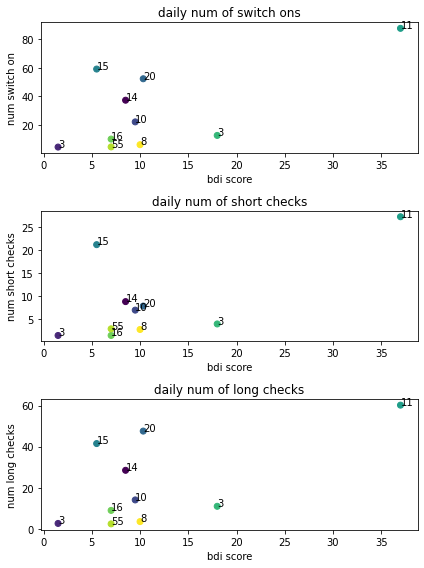

In [13]:
fig, ax = plt.subplots(3,figsize=(6, 8))

daily_num_switch_on_plot = pair_dicts_to_df(patient_dict, mean_daily_num_switch_on_dict, total_days_dict)
daily_num_short_checks_plot = pair_dicts_to_df(patient_dict, mean_daily_num_short_checks_dict, total_days_dict)
daily_num_long_checks_plot = pair_dicts_to_df(patient_dict, mean_daily_num_long_checks_dict, total_days_dict)
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(daily_num_switch_on_plot['user'])))

ax[0].scatter(daily_num_switch_on_plot['bdi'], daily_num_switch_on_plot['val'], c=colors)
ax[1].scatter(daily_num_short_checks_plot['bdi'], daily_num_short_checks_plot['val'],c=colors)
ax[2].scatter(daily_num_long_checks_plot['bdi'], daily_num_long_checks_plot['val'],c=colors)

ax[0].set_title("daily num of switch ons")
ax[1].set_title("daily num of short checks")
ax[2].set_title("daily num of long checks")

ax[0].set_ylabel("num switch on")
ax[1].set_ylabel("num short checks")
ax[2].set_ylabel("num long checks")

for i in range(3):
    ax[i].set_xlabel("bdi score")

for i, txt in enumerate(daily_num_switch_on_plot['days']):
    ax[0].annotate(txt, (daily_num_switch_on_plot['bdi'][i], daily_num_switch_on_plot['val'][i]))
    ax[1].annotate(txt, (daily_num_short_checks_plot['bdi'][i], daily_num_short_checks_plot['val'][i]))
    ax[2].annotate(txt, (daily_num_long_checks_plot['bdi'][i], daily_num_long_checks_plot['val'][i]))

# fig.text(0.5, 0, 'bdi score', ha='center', va='center')

fig.tight_layout()

In [14]:
def get_data_color(dict1):
    data_color = []
    for x in dict1:
        if x in clinical_users:
            data_color.append('red')
        else:
            data_color.append('black')

    return data_color

def get_total_days(dict1):
    return [  x + ' ' + str(power_stats[x]['total_days']) for x in dict1]


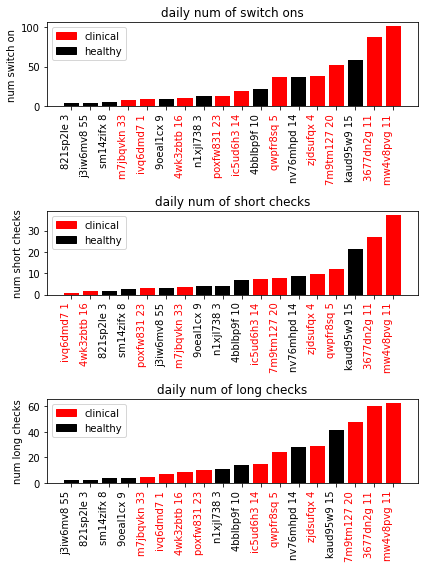

In [15]:
##  draw bar chart of power_state data compared to clinical/healthy index 
## x_axis shows user_id & number of days with recorded gps data
fig, ax = plt.subplots(3,figsize=(6, 8))

daily_num_switch_on_plot = {k:v for k,v in sorted(mean_daily_num_switch_on_dict.items(), key=lambda x: x[1])}
daily_num_short_checks_plot = {k:v for k,v in sorted(mean_daily_num_short_checks_dict.items(), key=lambda x: x[1])}
daily_num_long_checks_plot = {k:v for k,v in sorted(mean_daily_num_long_checks_dict.items(), key=lambda x: x[1])}

ax[0].bar(get_total_days(daily_num_switch_on_plot),
          daily_num_switch_on_plot.values(),
          color=get_data_color(daily_num_switch_on_plot))
ax[1].bar(get_total_days(daily_num_short_checks_plot), daily_num_short_checks_plot.values(), color=get_data_color(daily_num_short_checks_plot))
ax[2].bar(get_total_days(daily_num_long_checks_plot), daily_num_long_checks_plot.values(), color=get_data_color(daily_num_long_checks_plot))

ax[0].set_title("daily num of switch ons")
ax[1].set_title("daily num of short checks")
ax[2].set_title("daily num of long checks")

ax[0].set_ylabel("num switch on")
ax[1].set_ylabel("num short checks")
ax[2].set_ylabel("num long checks")

for ticklabel, tickcolor in zip(ax[0].get_xticklabels(), get_data_color(daily_num_switch_on_plot)):
         ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(ax[1].get_xticklabels(), get_data_color(daily_num_short_checks_plot)):
         ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(ax[2].get_xticklabels(), get_data_color(daily_num_long_checks_plot)):
         ticklabel.set_color(tickcolor)

        
plt.draw()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='clinical')
black_patch = mpatches.Patch(color='black', label='healthy')
for i in range(3):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90, ha='right')
    ax[i].legend(handles=[red_patch, black_patch])
    
fig.tight_layout()

In [16]:
def get_log_stats(user, data_path):
    df = pd.read_csv(data_path + '/' + user + '.csv')
    column_names = list(df.columns)[3:]
    mean_of_cols = {}
    max_of_cols = {}
    for col in column_names:
        mean_of_cols['daily_' + col] = round(np.mean(df[col]),2)
        mean_of_cols['max_' + col] = np.max(df[col])
    return mean_of_cols

data_path = 'user_summaries/log'
user = '3677dn2g'
get_log_stats(user, data_path)
## daily: mean average for each day of vale
## max: maximum of value for a day
### visit https://forest.beiwe.org/en/latest/willow.html for more info

{'daily_num_in_call': 2.0,
 'max_num_in_call': 13,
 'daily_num_out_call': 2.31,
 'max_num_out_call': 13,
 'daily_num_mis_call': 0.54,
 'max_num_mis_call': 2,
 'daily_num_in_caller': 1.15,
 'max_num_in_caller': 4,
 'daily_num_out_caller': 1.0,
 'max_num_out_caller': 3,
 'daily_num_mis_caller': 0.38,
 'max_num_mis_caller': 2,
 'daily_total_mins_in_call': 4.59,
 'max_total_mins_in_call': 31.116666666666667,
 'daily_total_mins_out_call': 5.75,
 'max_total_mins_out_call': 40.75,
 'daily_num_s': 0.0,
 'max_num_s': 0,
 'daily_num_r': 13.62,
 'max_num_r': 75,
 'daily_num_mms_s': 0.0,
 'max_num_mms_s': 0,
 'daily_num_mms_r': 0.0,
 'max_num_mms_r': 0,
 'daily_num_s_tel': 0.0,
 'max_num_s_tel': 0,
 'daily_num_r_tel': 0.92,
 'max_num_r_tel': 3,
 'daily_total_char_s': 0.0,
 'max_total_char_s': 0,
 'daily_total_char_r': 784.08,
 'max_total_char_r': 4413,
 'daily_text_reciprocity_incoming': 13.62,
 'max_text_reciprocity_incoming': 75,
 'daily_text_reciprocity_outgoing': 0.0,
 'max_text_reciprocity_ou

In [17]:
data_path = 'user_summaries/log/'
def get_list_users():
    users = os.listdir(data_path)
    return [x.replace('.csv','') for x in users]
get_list_users()

['n1xjl738',
 'sm14zifx',
 'ic5ud6h3',
 '4bblbp9f',
 'kaud95w9',
 '821sp2le',
 '7m9tm127',
 'nv76mhpd',
 'zjdsufqx',
 '4wk3zbtb',
 'poxfw831',
 '9oeal1cx',
 '3677dn2g']

In [18]:
users = get_list_users()
log_stats = {}
for user in users:
    log_stats[user] = get_log_stats(user, data_path)
# log_stats

In [19]:
## function for switching keys with values of a dict
def reverse_dict(dict1):
    new_dict = {}
    for user in dict1:
        for stat in dict1[user]:
            if stat not in new_dict:
                new_dict[stat] = {}
            if not np.isnan(dict1[user][stat]):
                new_dict[stat][user] = dict1[user][stat]
    return new_dict
new_log_stats = reverse_dict(log_stats)

for stat in new_log_stats:
    new_log_stats[stat] = {k:v for k,v in sorted(new_log_stats[stat].items(), key=lambda x: x[1])}
# new_log_stats

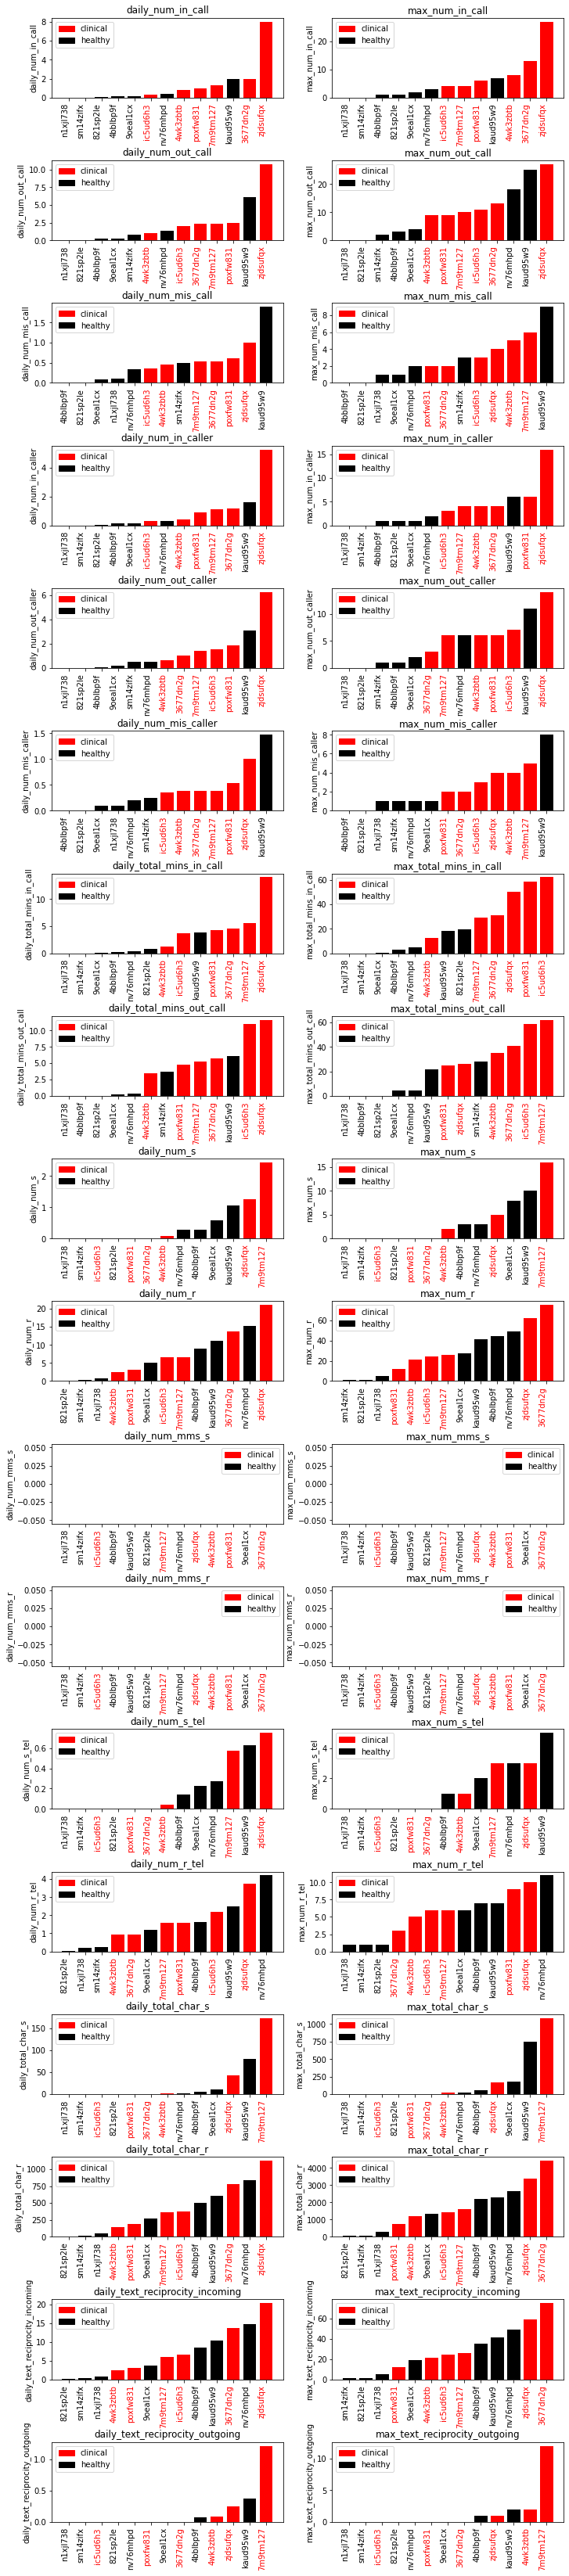

In [20]:
## bar chart call logs info in ascending order for each clinical user  
fig, ax = plt.subplots(nrows = len(new_log_stats)//2,ncols = 2,figsize=(12, 60), constrained_layout=True)

for i,stat in enumerate(new_log_stats):
    ax[i//2, i%2].bar(new_log_stats[stat].keys(),
              new_log_stats[stat].values(),
              color=get_data_color(new_log_stats[stat]))
    ax[i//2, i%2].set_title(stat)
    ax[i//2, i%2].set_ylabel(stat.replace('daily ', ''))
    for ticklabel, tickcolor in zip(ax[i//2, i%2].get_xticklabels(), get_data_color(new_log_stats[stat])):
         ticklabel.set_color(tickcolor)

plt.draw()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='clinical')
black_patch = mpatches.Patch(color='black', label='healthy')
for i in range(len(new_log_stats)):
    ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=90, ha='right')
    ax[i//2, i%2].legend(handles=[red_patch, black_patch])
fig.tight_layout()